In [10]:
import numpy as np
import scipy.stats as si

def BSM_call_value(S, K, t, T, r, sigma):
    """Price of a European call option using Black-Scholes-Merton formula.

    Parameters:
    S : float or array
        Current stock/index price
    K : float
        Strike price
    t : float
        Current time (0 if today)
    T : float
        Maturity time
    r : float
        Risk-free rate
    sigma : float
        Volatility

    Returns:
    call_value : float
        Option value
    """
    tau = T - t
    if tau <= 0:
        # Option expired
        return np.maximum(S - K, 0)

    d1 = (np.log(S / K) + (r + 0.5 * sigma **2) * tau ) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    call_value = S * si.norm.cdf(d1) - K * np.exp(-r * tau) * si.norm.cdf(d2)

    return call_value


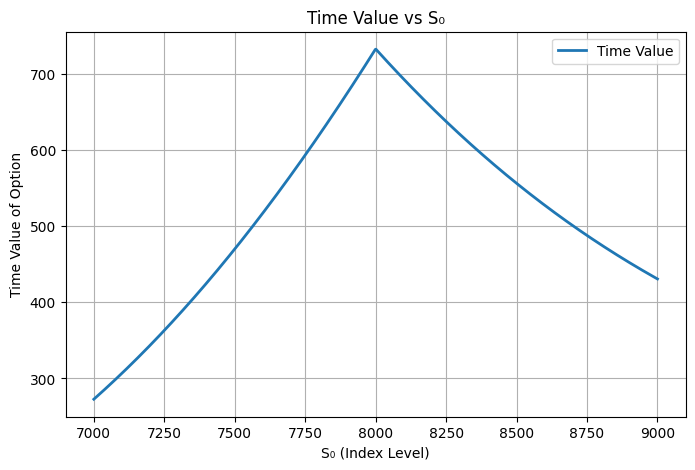

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 8000
S0 = np.linspace(7000, 9000, 1000)
T = 1.0
r = 0.025
sigma = 0.2

# Intrinsic value
intrin_value = np.maximum(S0 - K, 0)

# Total option value — loop version if needed
tot_value = np.array([BSM_call_value(s, K, 0, T, r, sigma) for s in S0])

# Time value
time_value = tot_value - intrin_value

# Plot
plt.figure(figsize=(8,5))
plt.plot(S0, time_value, lw=2, label='Time Value')
plt.grid(True)
plt.xlabel('S₀ (Index Level)')
plt.ylabel('Time Value of Option')
plt.legend()
plt.title('Time Value vs S₀')
plt.show()


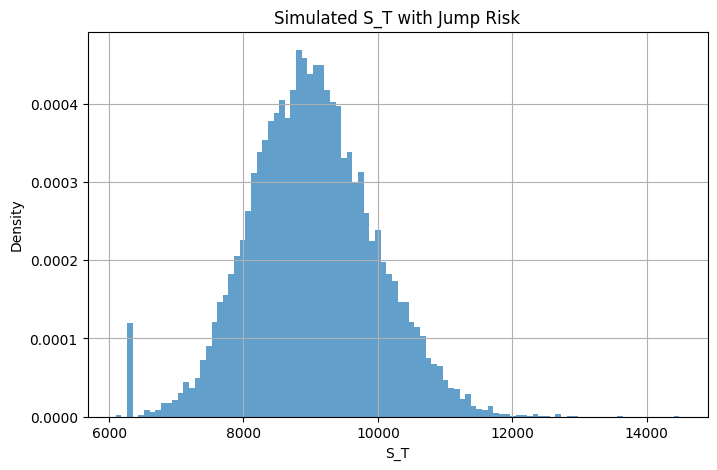

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 9000
n_samples = 10000
jump_prob = 0.01
sigma = 0.1  # volatility for normal moves
T = 1.0  # 1 year horizon

# Simulate
n_jumps = int(jump_prob * n_samples)
n_normal = n_samples - n_jumps

# Normal returns
normal_returns = np.random.normal(loc=0, scale=sigma * np.sqrt(T), size=n_normal)
S_T_normal = S0 * np.exp(normal_returns)

# Jump returns
S_T_jump = S0 * 0.7 * np.ones(n_jumps)  # -30% jump

# Combine
S_T_all = np.concatenate([S_T_normal, S_T_jump])

# Plot
plt.figure(figsize=(8,5))
plt.hist(S_T_all, bins=100, density=True, alpha=0.7)
plt.xlabel('S_T')
plt.ylabel('Density')
plt.title('Simulated S_T with Jump Risk')
plt.grid(True)
plt.show()


In [29]:
S_T

[array([8851.67159553, 8957.06120398, 8902.25894419, ..., 8990.8274124 ,
        9005.59589261, 8900.35522521], shape=(9900,)),
 [6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  6300.0,
  

In [48]:
import scipy.optimize as opt

# Given "market" parameters
S0 = 9000
K = 9000
T = 1.0
r = 0.025
market_price = 600  # this is the price we see in market

# Objective function: difference between model price and market price
def objective(sigma):
    model_price = BSM_call_value(S0, K, 0, T, r, sigma)
    return (model_price - market_price)**2  # squared error

# Run optimization to find implied vol
result = opt.minimize_scalar(objective, bounds=(0.01, 1.0), method='bounded')

implied_vol = result.x
print(f"Implied Volatility: {implied_vol:.4f}")

# Sanity check: plug implied_vol back into model
model_price_check = BSM_call_value(S0, K, 0, T, r, implied_vol)
print(f"Model Price with Implied Vol: {model_price_check:.2f} EUR")
print(f"Market Price: {market_price} EUR")


Implied Volatility: 0.1357
Model Price with Implied Vol: 600.00 EUR
Market Price: 600 EUR


In [49]:
def BSM_call_delta(S, K, t, T, r, sigma):
    tau = T - t
    if tau <= 0:
        return 0.0 if S < K else 1.0

    d1 = (np.log(S / K) + (r + 0.5 * sigma **2) * tau ) / (sigma * np.sqrt(tau))
    delta = si.norm.cdf(d1)
    return delta


In [50]:
def BSM_call_delta(S, K, t, T, r, sigma):
    tau = T - t
    if tau <= 0:
        return 0.0 if S < K else 1.0

    d1 = (np.log(S / K) + (r + 0.5 * sigma **2) * tau ) / (sigma * np.sqrt(tau))
    delta = si.norm.cdf(d1)
    return delta


In [52]:
# Parameters
S0 = 9000
K = 9000
T = 1.0
r = 0.025
sigma = 0.2
n_days = 252
dt = 1/n_days

# Simulate GBM path
np.random.seed(42)  # for reproducibility

S_path = [S0]
for i in range(n_days):
    z = np.random.normal()
    S_new = S_path[-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    S_path.append(S_new)

S_path = np.array(S_path)


In [53]:
S_path

array([9000.        , 9056.67838544, 9041.09507354, 9115.35408111,
       9292.13615005, 9264.94805591, 9237.84142289, 9423.66707293,
       9515.41303606, 9459.48487593, 9524.55674547, 9469.29738955,
       9414.0844071 , 9443.01380694, 9218.29378302, 9020.30262231,
       8956.80490473, 8843.4134281 , 8878.67134091, 8777.8520393 ,
       8623.21704733, 8784.10205064, 8759.32484721, 8766.95418216,
       8611.16095888, 8552.47240563, 8564.60271451, 8441.46972244,
       8481.68915322, 8417.91461909, 8387.20200409, 8324.02592995,
       8520.73305513, 8519.45327087, 8406.8437379 , 8494.5861574 ,
       8365.09503129, 8387.30262671, 8182.92191044, 8047.29136598,
       8067.43524487, 8143.00489738, 8160.76686064, 8149.04671108,
       8118.35253434, 7968.68478781, 7896.89872183, 7851.35755513,
       7956.78308596, 7991.46268945, 7816.06656492, 7848.2011031 ,
       7810.37210385, 7744.19889156, 7804.26415689, 7906.45477041,
       7999.9264935 , 7915.94474565, 7885.3229662 , 7918.45845

In [54]:
import scipy.stats as si

def BSM_call_delta(S, K, t, T, r, sigma):
    tau = T - t
    if tau <= 0:
        return 0.0 if S < K else 1.0

    d1 = (np.log(S / K) + (r + 0.5 * sigma **2) * tau ) / (sigma * np.sqrt(tau))
    delta = si.norm.cdf(d1)
    return delta


In [55]:
# Initial option value
option_value_0 = BSM_call_value(S0, K, 0, T, r, sigma)

# Start hedge
cash_account = option_value_0
position = BSM_call_delta(S0, K, 0, T, r, sigma)

# Initial action: buy delta * S₀ units
cash_account -= position * S0


In [57]:
position

np.float64(0.5890103628687297)

In [58]:
cash_account_daily  = option_value_0 - position * S0
position_daily = position

PnL_daily = []

for day in range(1, len(S_path)):
    t = day / n_days

    new_delta = BSM_call_delta(S_path[day], K, t, T, r, sigma)
    d_delta = new_delta - position_daily

    cash_account_daily *= np.exp(r * dt)
    cash_account_daily -= d_delta *S_path[day]

    position_daily = new_delta

    option_value_now = BSM_call_delta(S_path[day], K, t, T, r, sigma)
    PnL = cash_account_daily + position_daily *S_path[day] - option_value_now
    PnL_daily.append(PnL)

In [59]:
cash_account_weekly = option_value_0 - position * S0
position_weekly = position

PnL_weekly = []

for day in range(1, len(S_path)):
    t = day / n_days

    # Rebalance only every 5 days
    if day % 5 == 0:
        new_delta = BSM_call_delta(S_path[day], K, t, T, r, sigma)
        d_delta = new_delta - position_weekly
        cash_account_weekly *= np.exp(r * dt * 5)
        cash_account_weekly -= d_delta * S_path[day]
        position_weekly = new_delta

    # Compute P&L
    option_value_now = BSM_call_value(S_path[day], K, t, T, r, sigma)
    PnL = cash_account_weekly + position_weekly * S_path[day] - option_value_now
    PnL_weekly.append(PnL)


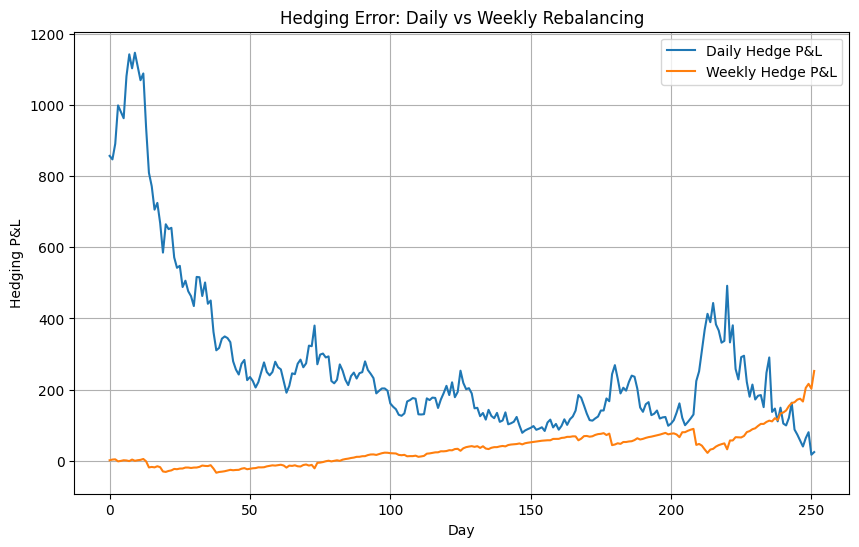

In [60]:
plt.figure(figsize=(10,6))
plt.plot(PnL_daily, label='Daily Hedge P&L')
plt.plot(PnL_weekly, label='Weekly Hedge P&L')
plt.xlabel('Day')
plt.ylabel('Hedging P&L')
plt.legend()
plt.title('Hedging Error: Daily vs Weekly Rebalancing')
plt.grid(True)
plt.show()
